# Projet Machine Learning 4A

## Importation des librairies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

C:\Users\aboui\AppData\Local\Temp\ipykernel_47628\1747830264.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#Model
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

## Importation du jeu de données

In [4]:
data= pd.read_csv("global-data-on-sustainable-energy (1).csv")
data.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density\n(P/Km2) Land Area(Km2)  Latitude  Longitude  
0                60       652230.0  33.93911  67.709953  
1          

En affichant que les 5 premières lignes de notre data frame, on remarque déjà qu'il y a des données manquantes.

## Analyse exploratoire du jeu de données

In [5]:
data.shape

(3649, 21)

Nous remarquons qu'il se trouve alors 21 variables dans notre jeu de données onn ne sait pas encore si elles sont qualitatives ou quantitatives. Nous pouvons supposer que la variable 'Entity' est qualitative, car  elle détient 3649 observations qui sont les noms des pays du monde.

In [6]:
data.describe().T

count          mean  \
Year                                                3649.0  2.010038e+03   
Access to electricity (% of population)             3639.0  7.893370e+01   
Access to clean fuels for cooking                   3480.0  6.325529e+01   
Renewable-electricity-generating-capacity-per-c...  2718.0  1.131375e+02   
Financial flows to developing countries (US $)      1560.0  9.422400e+07   
Renewable energy share in the total final energ...  3455.0  3.263816e+01   
Electricity from fossil fuels (TWh)                 3628.0  7.036500e+01   
Electricity from nuclear (TWh)                      3523.0  1.345019e+01   
Electricity from renewables (TWh)                   3628.0  2.396801e+01   
Low-carbon electricity (% electricity)              3607.0  3.680118e+01   
Primary energy consumption per capita (kWh/person)  3649.0  2.574398e+04   
Energy intensity level of primary energy (MJ/$2...  3442.0  5.307345e+00   
Value_co2_emissions_kt_by_country                   3221.0  1.598665e+05   
Renewables (% equivalent primary energy)            1512.0  1.198671e+01   
gdp_growth                                          3332.0  3.441610e+00   
gdp_per_capita                                      3367.0  1.328377e+04   
Land Area(Km2)                                      3648.0  6.332135e+05   
Latitude                                            3648.0  1.824639e+01   
Longitude                                           3648.0  1.482269e+01   

                                                             std          min  \
Year                                                6.054228e+00  2000.000000   
Access to electricity (% of population)             3.027554e+01     1.252269   
Access to clean fuels for cooking                   3.904366e+01     0.000000   
Renewable-electricity-generating-capacity-per-c...  2.441673e+02     0.000000   
Financial flows to developing countries (US $)      2.981544e+08     0.000000   
Renewable energy share in the total final energ...  2.989490e+01     0.000000   
Electricity from fossil fuels (TWh)                 3.480519e+02     0.000000   
Electricity from nuclear (TWh)                      7.300662e+01     0.000000   
Electricity from renewables (TWh)                   1.044311e+02     0.000000   
Low-carbon electricity (% electricity)              3.431488e+01     0.000000   
Primary energy consumption per capita (kWh/person)  3.477322e+04     0.000000   
Energy intensity level of primary energy (MJ/$2...  3.532020e+00     0.110000   
Value_co2_emissions_kt_by_country                   7.736611e+05    10.000000   
Renewables (% equivalent primary energy)            1.499464e+01     0.000000   
gdp_growth                                          5.686720e+00   -62.075920   
gdp_per_capita                                      1.970987e+04   111.927225   
Land Area(Km2)                                      1.585519e+06    21.000000   
Latitude                                            2.415923e+01   -40.900557   
Longitude                                           6.634815e+01  -175.198242   

                                                              25%  \
Year                                                  2005.000000   
Access to electricity (% of population)                 59.800890   
Access to clean fuels for cooking                       23.175000   
Renewable-electricity-generating-capacity-per-c...       3.540000   
Financial flows to developing countries (US $)      260000.000000   
Renewable energy share in the total final energ...       6.515000   
Electricity from fossil fuels (TWh)                      0.290000   
Electricity from nuclear (TWh)                           0.000000   
Electricity from renewables (TWh)                        0.040000   
Low-carbon electricity (% electricity)                   2.877847   
Primary energy consumption per capita (kWh/person)    3116.737300   
Energy intensity level of primary energy (MJ/$2...       3.170000   
Value_co2_emis

Nous remarquons d'après la variable count de notre describe (similaire au summary sur R), que les variables ne possèdent pas le même nombre d'observations. Nous pourrons l'observer plus précisément plus tard. De plus, cette analyse est faite sur les variables quantitatives de notre jeu de données, et nous pouvons observer la présence de la variable 'Year', qui devrait être quantitative, ainsi que l'abscence de la variable 'Density', qui elle devrait être quantitative. Des transformations du type des variables s'impose !

In [7]:
data.describe(include = 'object').T

count unique          top freq
Entity            3649    176  Afghanistan   21
Density\n(P/Km2)  3648    124           25  147

Nous affichons les caractéristiques des variables quantitatives avant la transformation du type et nous remarquons la présence de la variable 'Density'. 

On se demande aussi combien de variables uniques possèdent chaque variable.

In [8]:
unique_values =  data.nunique()
unique_values

Entity                                                               176
Year                                                                  21
Access to electricity (% of population)                             2040
Access to clean fuels for cooking                                    896
Renewable-electricity-generating-capacity-per-capita                2110
Financial flows to developing countries (US $)                      1017
Renewable energy share in the total final energy consumption (%)    2587
Electricity from fossil fuels (TWh)                                 1859
Electricity from nuclear (TWh)                                       547
Electricity from renewables (TWh)                                   1533
Low-carbon electricity (% electricity)                              2647
Primary energy consumption per capita (kWh/person)                  3628
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         1044
Value_co2_emissions_kt_by_country                  

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [10]:
data.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [11]:
data.rename(columns={'Density\\n(P/Km2)': 'Density'}, inplace=True)
data['Density'] = pd.to_numeric(data['Density'].str.replace(',', ''), errors='coerce').astype('Int64')

In [12]:
data.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

On bien changé la variable 'Density' en numérique (qualitative).

In [13]:
data['Year']=data['Year'].astype('object')

In [14]:
data.dtypes

Entity                                                               object
Year                                                                 object
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [15]:
data.rename(columns={"Value_co2_emissions_kt_by_country":"CO2" , 'Land Area(Km2)':'Land'} , inplace=True)

## Valeurs manquantes

In [16]:
missing_values = data.isna().sum()


fig = px.bar(x=missing_values.index, y=missing_values.values, labels={'x': 'Columns', 'y': 'Missing Values Count'},
             title='Count of Missing Values in Each Column')
fig.show()

In [17]:
data.drop(columns=['Financial flows to developing countries (US $)','Renewables (% equivalent primary energy)',
                 'Renewable-electricity-generating-capacity-per-capita'], inplace=True)

In [18]:
data.shape

(3649, 18)

## Supression des valeurs manquantes

In [19]:
data2 = data.dropna()

In [20]:
data2.shape

(2868, 18)

# Analyse descriptive unidimensionnelle

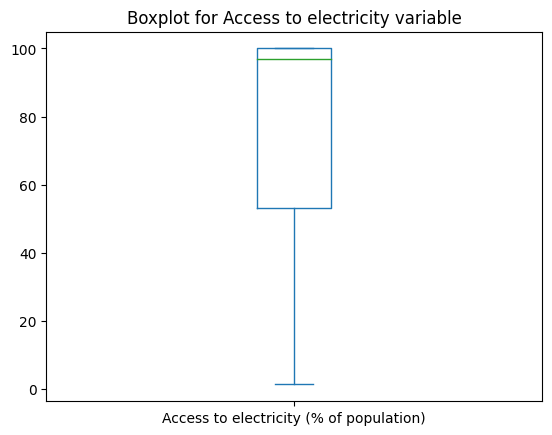

In [21]:
data2['Access to electricity (% of population)'].plot(kind='box')
plt.title("Boxplot for Access to electricity variable")
plt.show()

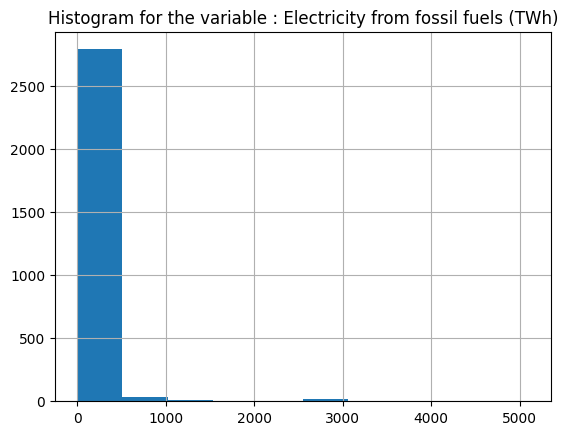

In [22]:
data2['Electricity from fossil fuels (TWh)'].hist()
plt.title("Histogram for the variable : Electricity from fossil fuels (TWh)")
plt.show()

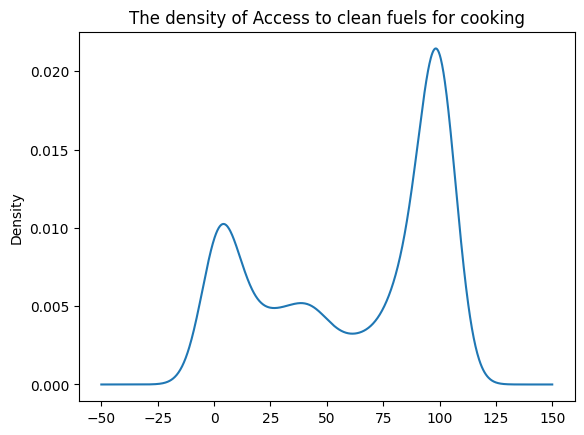

In [23]:
data2["Access to clean fuels for cooking"].plot(kind="density")
plt.title("The density of Access to clean fuels for cooking")
plt.show()

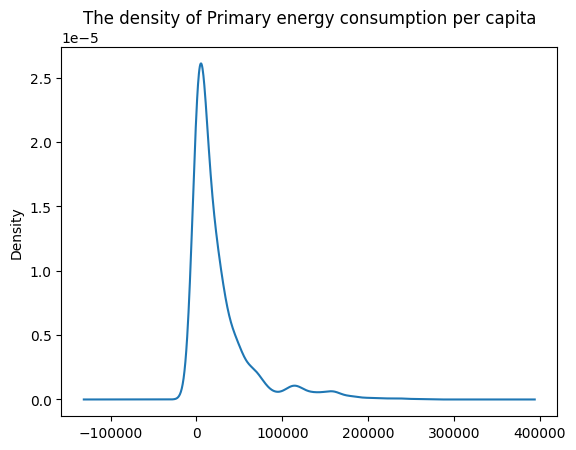

In [24]:
data2["Primary energy consumption per capita (kWh/person)"].plot(kind="density")
plt.title("The density of Primary energy consumption per capita")
plt.show()

In [25]:
from math import sqrt, log
data2["Primary energy consumption per capita new"]=data2["Primary energy consumption per capita (kWh/person)"].map(lambda x: log(x))
del data2["Primary energy consumption per capita (kWh/person)"]

C:\Users\aboui\AppData\Local\Temp\ipykernel_47628\2701592788.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



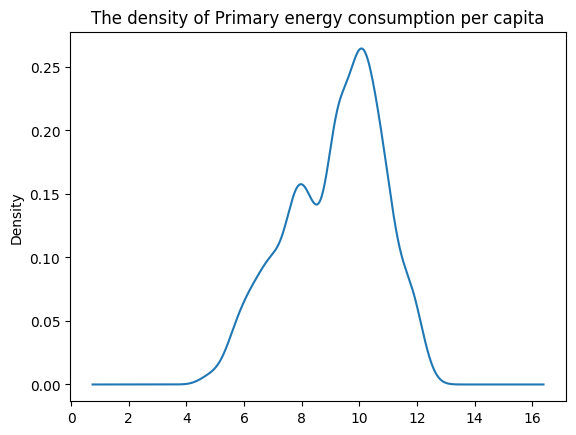

In [26]:
data2["Primary energy consumption per capita new"].plot(kind="density")
plt.title("The density of Primary energy consumption per capita")
plt.show()

# Analyse descriptive multidimensionnelle

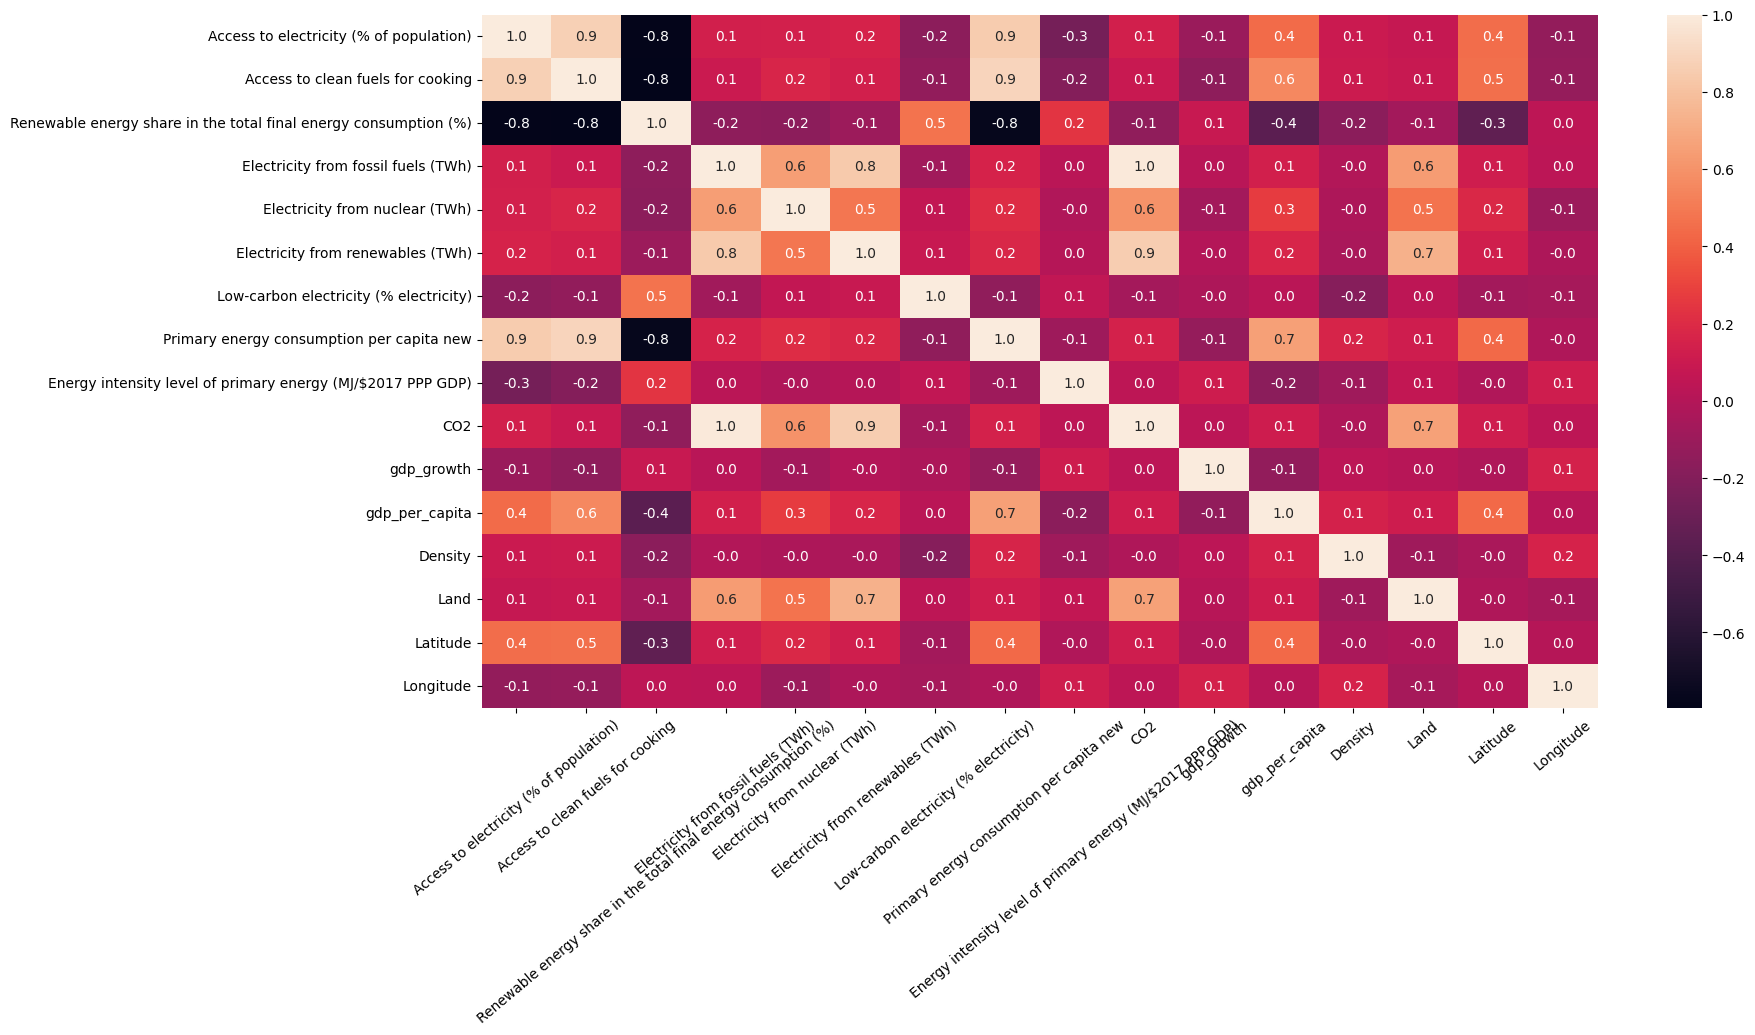

In [27]:
plt.figure(figsize=(18,9))

cols=[ 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita new',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'CO2',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude']

# correlation between columns
sns.heatmap(data2[cols].corr(), annot=True, fmt='.1f')
plt.xticks(rotation=40)

plt.show()

In [28]:
plt.figure(figsize=(18,9))

cols2=[ 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)']

fig = px.scatter(data2[cols2])
fig.show()

<Figure size 1800x900 with 0 Axes>

On remarque une grande dépendance entre les variables 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)' et 'Electricity from renewables (TWh)', comme vu sur le graphe de corrélations. Mais pas trop avec'Low-carbon electricity (% electricity)'.

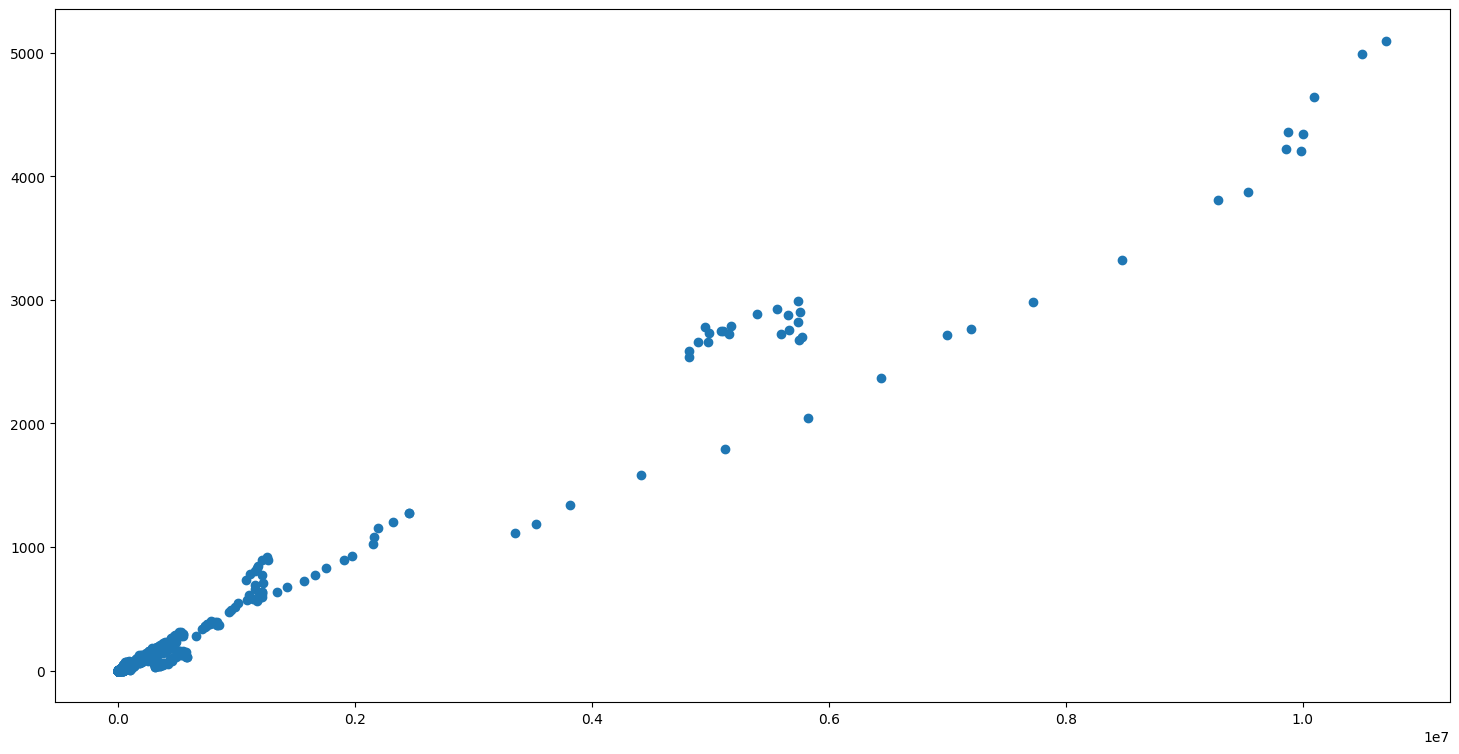

In [29]:
plt.figure(figsize=(18,9))

cols3=['CO2','Electricity from fossil fuels (TWh)' ]

fig = plt.scatter(data2['CO2'], data2['Electricity from fossil fuels (TWh)'])
plt.show()

On plot la variable la plus corrélée avec la variable à prédire qui est CO2. Nous remarquons une distribution linéraire entre les variables. 

## PCA

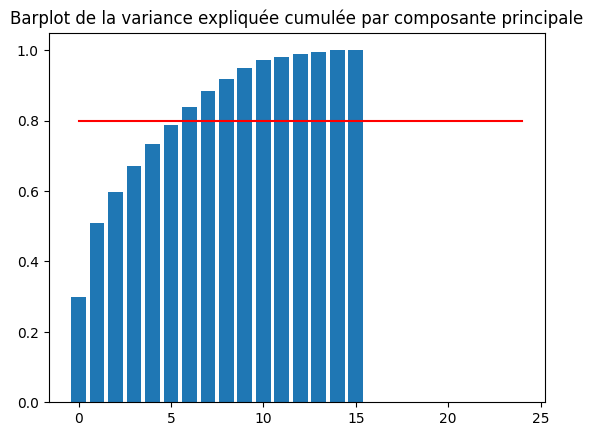

In [30]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale


pca = PCA()

cols_quanti= [ 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita new',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'CO2',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude']

data2_quanti= data2[cols_quanti]

#On estime nos composantes principales
pcaR = pd.DataFrame(scale(data2_quanti), columns = data2_quanti.columns)
C = pca.fit(pcaR).transform(pcaR)

plt.bar(np.arange(len(pca.explained_variance_ratio_))[0:24],height=np.cumsum(pca.explained_variance_ratio_[0:24]))
plt.plot(range(0,25), np.ones(25)*0.8, c='r')
plt.title("Barplot de la variance expliquée cumulée par composante principale")
plt.show()

Pour expliquer 80% de la variance, il faut prendre les 7 premières composantes principales. 

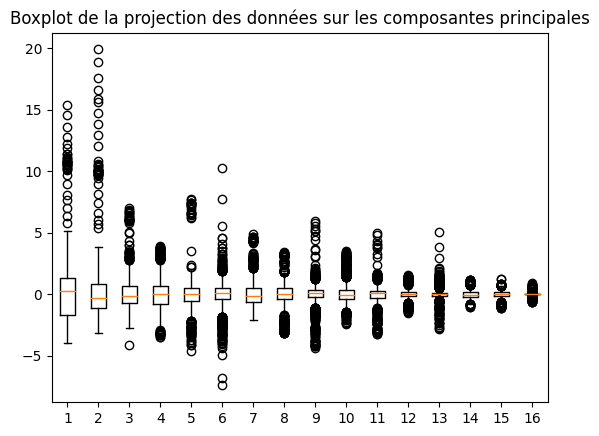

In [31]:
plt.boxplot(C[:,0:20])
plt.title("Boxplot de la projection des données sur les composantes principales")
plt.show()

## Projection des variables sur le plan d'ACP

Projection sur la première et deuxième dimension d'ACP :

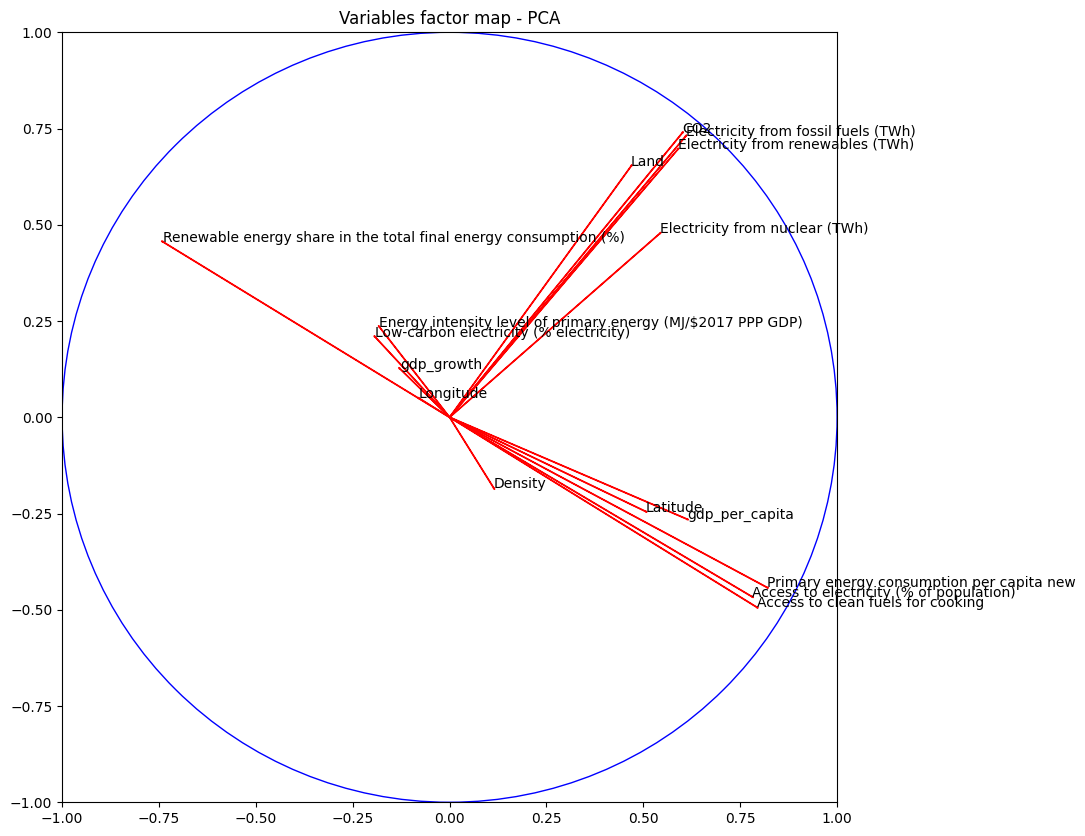

In [32]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data2_quanti.columns):
    plt.text(i, j, nom)
    plt.arrow(0, 0, i, j, color = 'r', width = 0.001)
plt.axis((-1, 1, -1, 1))
#Cercle
c = plt.Circle((0, 0), radius = 1, color = 'b', fill = False)
ax.add_patch(c)
plt.title('Variables factor map - PCA')
plt.show()

Projection sur la première et troisième dimension d'ACP :

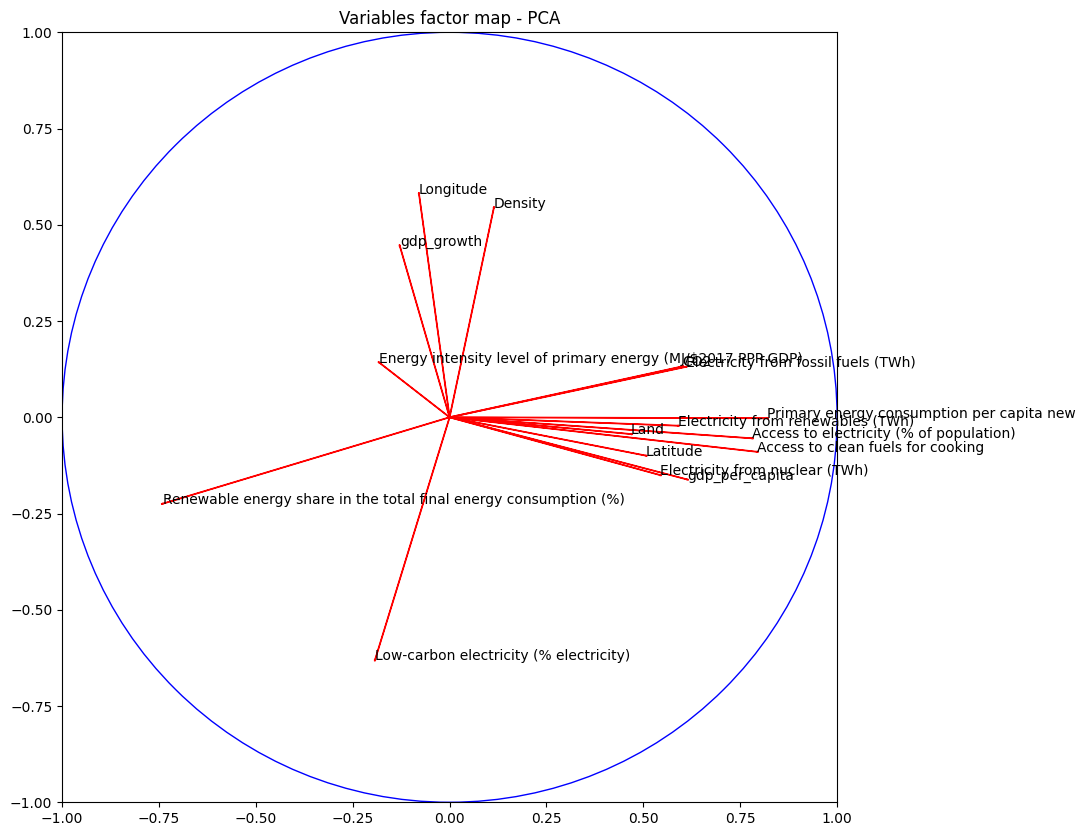

In [33]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[2] * np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data2_quanti.columns):
    plt.text(i, j, nom)
    plt.arrow(0, 0, i, j, color = 'r', width = 0.001)
plt.axis((-1, 1, -1, 1))
#Cercle
c = plt.Circle((0, 0), radius = 1, color = 'b', fill = False)
ax.add_patch(c)
plt.title('Variables factor map - PCA')
plt.show()

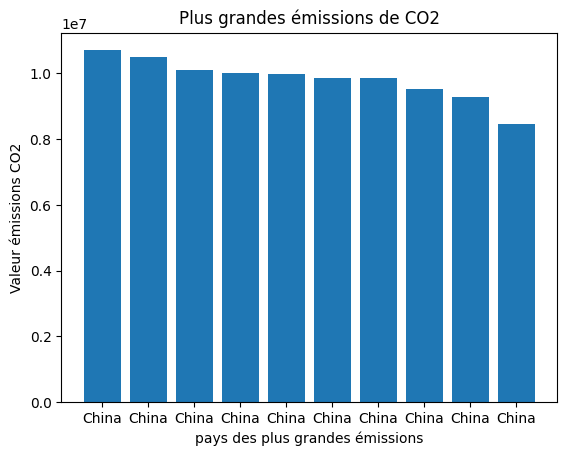

In [34]:
CO2_grand = data2['CO2'].nlargest(10)
pays_CO2_grand=data2.loc[CO2_grand.index]['Entity']

plt.figure()
plt.bar(range(len(CO2_grand)), CO2_grand)
plt.title("Plus grandes émissions de CO2")
plt.xlabel("pays des plus grandes émissions")
plt.ylabel("Valeur émissions CO2")
plt.xticks(range(len(CO2_grand)), pays_CO2_grand)
plt.show()

In [35]:
CO2_max = data2.groupby('Entity')['CO2'].max().reset_index()
CO2_max = CO2_max.sort_values(by='CO2', ascending=False)

CO2_max5=CO2_max.head(5)

fig = px.bar(
    CO2_max5,  
    x='Entity',  
    y='CO2',  
    color='CO2',  
    title='Top 5 des pays ayant le plus emis de CO2',  
    labels={'Country': 'Pays', 'CO2': 'Emissions CO2'},  
    template='plotly_white'  
)

fig.show()

## Question 8

C:\Users\aboui\AppData\Local\Temp\ipykernel_47628\1260795128.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




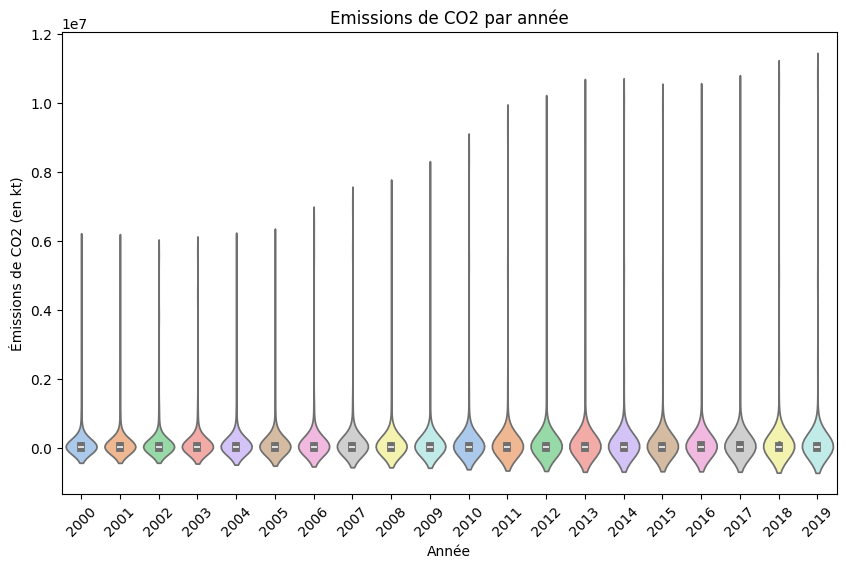

In [36]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Year', y='CO2', data=data2, palette='pastel')
plt.title('Emissions de CO2 par année')
plt.xlabel('Année')
plt.ylabel('Émissions de CO2 (en kt)')
plt.xticks(rotation=45)
plt.show()

In [37]:
fig=px.box(data2, x= 'Year', y='CO2')
fig.show()

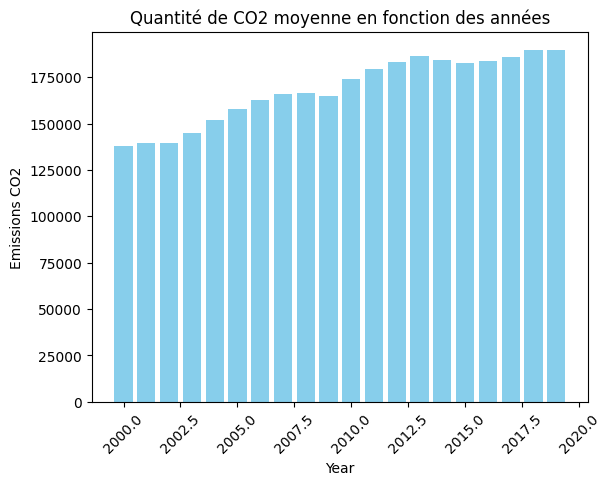

In [38]:
CO2_moy_year = data2.groupby('Year')['CO2'].mean().reset_index()


CO2_moy_year20 = CO2_moy_year.nsmallest(20, 'CO2')

plt.bar(CO2_moy_year20['Year'], CO2_moy_year20['CO2'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Emissions CO2')
plt.title('Quantité de CO2 moyenne en fonction des années')
plt.xticks(rotation=45)
plt.show()

In [39]:
#question 8:
CO2_max_year = data2.groupby('Year')['CO2'].max().reset_index()
CO2_max_year = CO2_max_year.sort_values(by='CO2', ascending=True)

CO2_max_year5=CO2_max_year.head(25)

fig = px.bar(
    CO2_max_year5,  
    x='Year',  
    y='CO2',  
    color='CO2',  
    title='CO2 en fonction des années',  
    labels={'Country': 'Year', 'CO2': 'Emissions CO2'},  
    template='plotly_white'  
)

fig.show()

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [41]:
model1 = ols('CO2 ~ Year', data=data2).fit()
print(model1.summary())


model2 = ols('CO2 ~ 1', data=data2).fit()

#on compare le model 1 au 2 en faisant une ANOVA
print(sm.stats.anova_lm(model2, model1))

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.06815
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               1.00
Time:                        13:16:01   Log-Likelihood:                -43115.
No. Observations:                2868   AIC:                         8.627e+04
Df Residuals:                    2848   BIC:                         8.639e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      1.38e+05   7.01e+04      1.969   

On fait un test d'indépendance:

In [42]:
from scipy.stats import chi2_contingency


chi2_test = chi2_contingency(pd.crosstab(data2['CO2'], data2['Year']))
print(chi2_test)


model3 = ols('CO2 ~ Year + Entity', data=data2).fit()
print(model3.summary())


model4 = ols('CO2 ~ Entity', data=data2).fit()


print(sm.stats.anova_lm(model4, model3))

Chi2ContingencyResult(statistic=41100.85232804808, pvalue=0.14064536991497775, dof=40793, expected_freq=array([[0.09553696, 0.09623431, 0.09762901, ..., 0.10181311, 0.10181311,
        0.10181311],
       [0.2388424 , 0.24058577, 0.24407252, ..., 0.25453278, 0.25453278,
        0.25453278],
       [0.2388424 , 0.24058577, 0.24407252, ..., 0.25453278, 0.25453278,
        0.25453278],
       ...,
       [0.04776848, 0.04811715, 0.0488145 , ..., 0.05090656, 0.05090656,
        0.05090656],
       [0.04776848, 0.04811715, 0.0488145 , ..., 0.05090656, 0.05090656,
        0.05090656],
       [0.04776848, 0.04811715, 0.0488145 , ..., 0.05090656, 0.05090656,
        0.05090656]]))
                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     221.7
Da

   df_resid           ssr  df_diff       ss_diff         F    Pr(>F)
0    2720.0  1.324125e+14      0.0           NaN       NaN       NaN
1    2701.0  1.311919e+14     19.0  1.220555e+12  1.322578  0.157555


# Partie 2

## Question 1

In [43]:
data3 = data2
data3.drop(columns ='Electricity from fossil fuels (TWh)',inplace=True)

C:\Users\aboui\AppData\Local\Temp\ipykernel_47628\2979254775.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
data3.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'CO2',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude', 'Primary energy consumption per capita new'],
      dtype='object')

Nous avons bien supprimé la variable 'Electricity from fossil fuels (TWh)', qui est très corrélée avec notre variable à prédire.

In [45]:
data3.dtypes

Entity                                                               object
Year                                                                 object
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
CO2                                                                 float64
gdp_growth                                                          float64
gdp_per_capita                                                      float64
Density                                                               Int64
Land        

In [46]:
cols=[ 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita new',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude']
X = data3[cols]
y = data3['CO2']

In [47]:
X.head()

Access to electricity (% of population)  Access to clean fuels for cooking  \
3                                14.738506                               9.50   
4                                20.064968                              10.90   
5                                25.390894                              12.20   
6                                30.718690                              13.85   
7                                36.051010                              15.30   

   Renewable energy share in the total final energy consumption (%)  \
3                                              36.66                  
4                                              44.24                  
5                                              33.88                  
6                                              31.89                  
7                                              28.78                  

   Electricity from nuclear (TWh)  Electricity from renewables (TWh)  \
3                             0.0                               0.63   
4                             0.0                               0.56   
5                             0.0                               0.59   
6                             0.0                               0.64   
7                             0.0                               0.75   

   Low-carbon electricity (% electricity)  \
3                               67.021280   
4                               62.921350   
5                               63.440857   
6                               76.190475   
7                               78.947370   

   Primary energy consumption per capita new  \
3                                   5.437941   
4                                   5.319253   
5                                   5.529703   
6                                   5.718411   
7                                   5.870087   

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  gdp_growth  \
3                                               1.40              8.832278   
4                                               1.20              1.414118   
5                                               1.41             11.229715   
6                                               1.50              5.357403   
7                                               1.53             13.826320   

   gdp_per_capita  Density      Land  Latitude  Longitude  
3      190.683814       60  652230.0  33.93911  67.709953  
4      211.382074       60  652230.0  33.93911  67.709953  
5      242.031313       60  652230.0  33.93911  67.709953  
6      263.733602       60  652230.0  33.93911  67.709953  
7      359.693158       60  652230.0  33.93911  67.709953

On sépare notre jeu de données en jeu de données d'apprentissage et test :

In [48]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [68]:
train_data = pd.concat([X_train, y_train], axis=1)

In [49]:
data3.shape

(2868, 17)

In [50]:
X_train.shape

(2294, 14)

In [52]:
X_train.columns

Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita new',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude'],
      dtype='object')

In [51]:
X_train.head

<bound method NDFrame.head of       Access to electricity (% of population)  \
2485                               100.000000   
2335                               100.000000   
858                                 99.521210   
811                                 99.563515   
2852                                52.587242   
...                                       ...   
2113                                36.362160   
1410                                 1.253706   
1446                                90.295815   
1640                               100.000000   
1139                                14.000000   

      Access to clean fuels for cooking  \
2485                              100.0   
2335                              100.0   
858                                93.5   
811                                93.6   
2852                                0.4   
...                                 ...   
2113                               42.7   
1410                                1

In [53]:
X_test.shape

(574, 14)

In [54]:
y_train.shape

(2294,)

In [56]:
y_train.name

'CO2'

In [57]:
y_test.shape

(574,)

On a bien divisé notre jeu de données en 80-20. Cette étape est primordiale car elle permet de diviser notre jeu de données en 80-20, et pour éviter le sur-ajustement (overfitting) cela permet à ce que le jeu de données test représente la majorité de la variance de notre jeu données. Et cela nous permettra d'obtenir un bon modèle par validation croisée.

Pour pouvoir comparer les modèles, on créé une fonction qui permet de tracer les résidus avec une échelle fixe

In [58]:
def plot_res(x, y, title="titre"):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue')
    plt.xlim(0, 2500)
    plt.ylim(-500000, 500000)
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Résidus")
    plt.title(title)
    plt.axhline(y=0, color='green', linestyle='-')
    plt.show()

## Question 2:

In [59]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network': MLPRegressor()
}

In [60]:

best_model = None
best_r2 = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)

  
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    submit = pd.DataFrame()
    submit['Actual Electricity'] = y_test
    submit['Predict_Electricity'] = y_pred
    submit = submit.reset_index()
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__
    
    print(f'{model_name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))
    print('----------------------------------------')
print(f"The best performing model is: {best_model} with accuracy: {best_r2:.2f}")

Linear Regression:
R2 Score: 0.79
Mean Absolute Error (MAE): 163432.25
Root Mean Squared Error (RMSE): 367873.79
   index  Actual Electricity  Predict_Electricity
0    573         2960.000038        180493.616660
1   3083       404200.012200        156245.819681
2   1005        40139.999390        -87385.895083
3    854        26690.000530        -51379.143518
4   3423         2019.999981        -90439.583561
----------------------------------------
Lasso:
R2 Score: 0.79
Mean Absolute Error (MAE): 163432.34
Root Mean Squared Error (RMSE): 367873.90
   index  Actual Electricity  Predict_Electricity
0    573         2960.000038        180493.738903
1   3083       404200.012200        156246.196836
2   1005        40139.999390        -87387.736700
3    854        26690.000530        -51379.404736
4   3423         2019.999981        -90442.234463
----------------------------------------
Ridge:
R2 Score: 0.79
Mean Absolute Error (MAE): 163433.68
Root Mean Squared Error (RMSE): 367874.69
   

In [61]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.dropna()

In [62]:
y_train = pd.to_numeric(y_train, errors='coerce')
y_train = y_train.dropna()

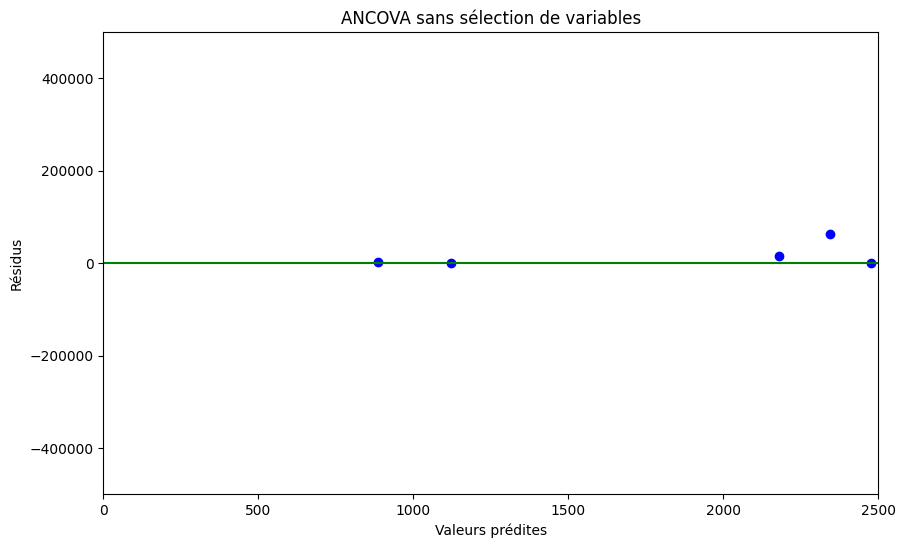

In [63]:
reg_lm = LinearRegression().fit(X_train, y_train)
y_pred= reg_lm.predict(X_test)
residuals = y_test - y_pred

plot_res(x=y_pred, y=residuals, title="ANCOVA sans sélection de variables")

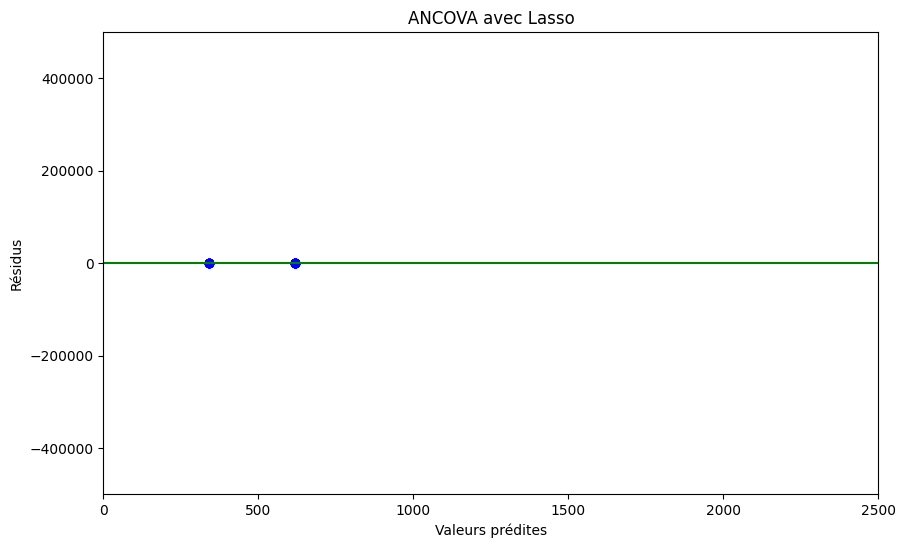

In [64]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV(cv=5, random_state=42).fit(X_train, y_train)
res_lasso = y_train - lasso_model.predict(X_train)
fit_lasso = lasso_model.predict(X_train)
plot_res(fit_lasso, res_lasso, "ANCOVA avec Lasso")

## SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np





svm_model_linear = SVR(kernel='linear').fit(X_train.values, y_train.values)

# Fit SVM regression with a radial (Gaussian) kernel
svm_model_gaussien = SVR(kernel='rbf').fit(X_train.values, y_train.values)

# Fit SVM regression with the default radial kernel
svm_model_default = SVR().fit(X, y)

# Perform hyperparameter tuning with grid search
param_grid = {'C': [1, 2, 3, 4, 5], 'gamma': np.arange(0.0, 0.31, 0.05)}
svm_reg_tune = GridSearchCV(SVR(), param_grid, cv=5).fit(X, y)

# Get the best model
best_svm_model = svm_reg_tune.best_estimator_

# Print summary of the best model
print(best_svm_model)


In [ ]:
fit_svmr = best_svm_model.predict(X)
res_svmr = fit_svmr - y

# Plot residuals using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(fit_svmr, res_svmr, color='blue')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals SVM")
plt.axhline(y=0, color='green', linestyle='-')
plt.show()

In [77]:
param_grids = {
    'Linear Regression': {},
    'Lasso': {'alpha': [0.1, 1, 10]},
    'Ridge': {'alpha': [0.1, 1, 10]},
    'SVR': {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_leaf': [1, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_leaf': [1, 5, 10]},
    'Gradient Boosting': {'learning_rate': [0.05, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]},
    'Neural Network': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'tanh']}
}

## Arbre de décision

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

param_grid = {'ccp_alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1]}
tree_model = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10).fit(X, y)

plt.figure(figsize=(15, 10))
plot_tree(tree_model.best_estimator_, filled=True, rounded=True, feature_names=train_data.columns[:-1])
plt.show()

# Get cross-validated errors for each value of ccp_alpha
cv_errors = tree_model.cv_results_['mean_test_score']

# Plot cross-validated errors
plt.figure(figsize=(10, 6))
plt.plot(param_grid['ccp_alpha'], cv_errors, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Cross-validated Error")
plt.title("Cross-validated Error vs. ccp_alpha")
plt.xscale('log')
plt.show()